In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

C:\Users\Sony\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv(path)

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
data.shape

(41188, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [12]:
# distribution of age

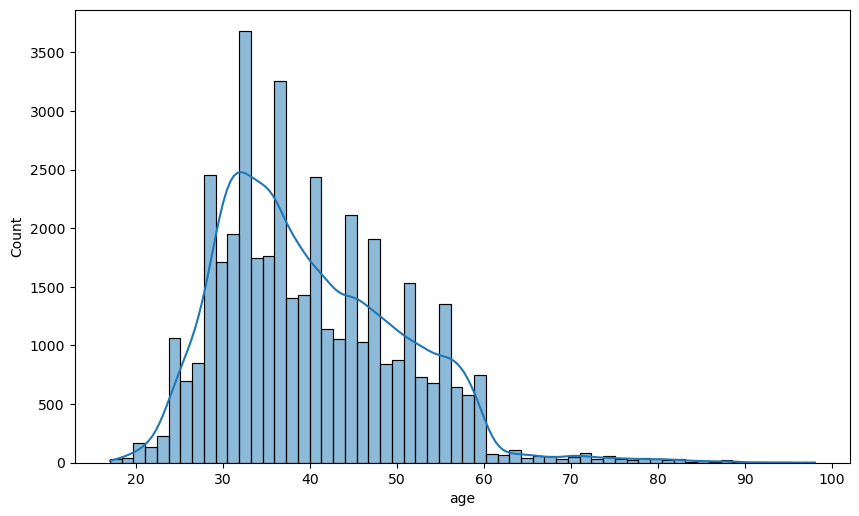

In [16]:
plt.figure(figsize = (10 , 6) , dpi=100)

sns.histplot(data = data , x = "age", bins = 60, kde = True);

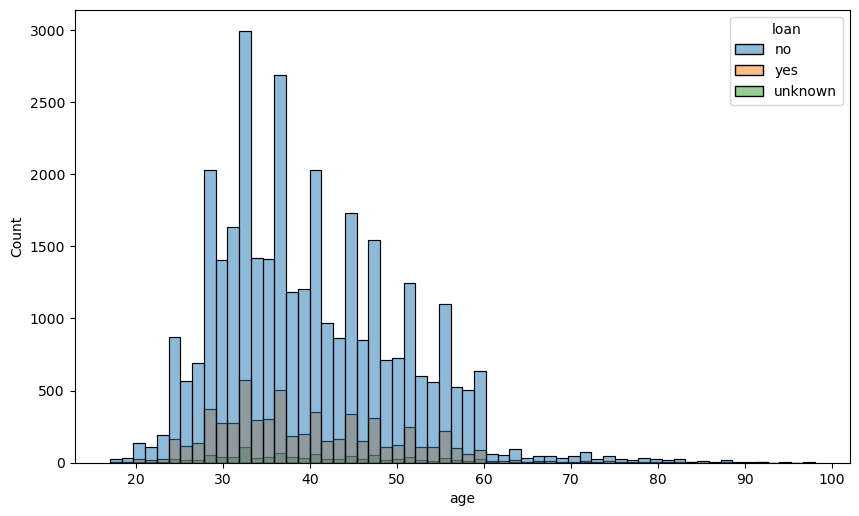

In [18]:
plt.figure(figsize = (10 , 6) , dpi=100)

sns.histplot(data = data , x = "age", bins = 60, hue = "loan");

There are a lot of people in all age group who have not borrowed any loan and may become our target audiance for campaigning.

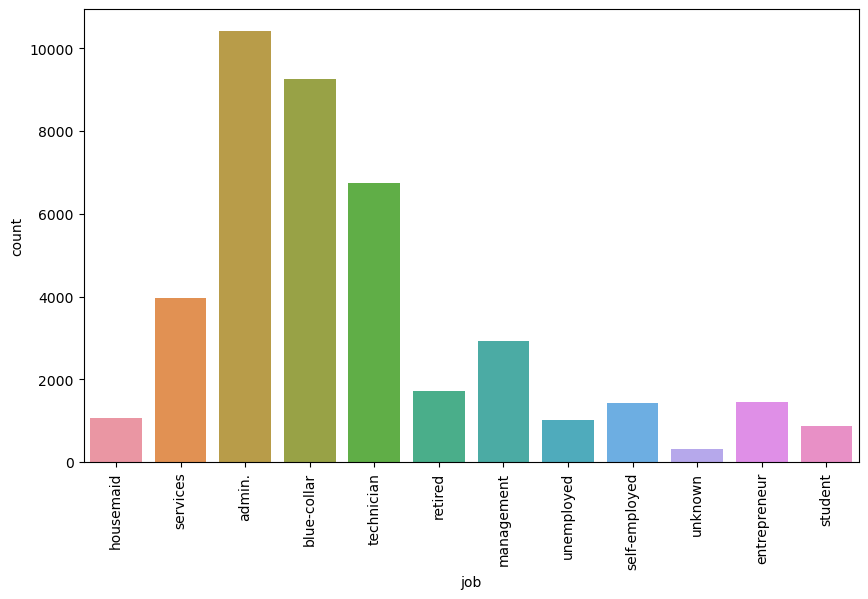

In [21]:
plt.figure(figsize = (10 , 6) , dpi=100)

sns.countplot(data = data , x = "job")

plt.xticks(rotation = 90);

In [23]:
data["job"].value_counts().index

Index(['admin.', 'blue-collar', 'technician', 'services', 'management',
       'retired', 'entrepreneur', 'self-employed', 'housemaid', 'unemployed',
       'student', 'unknown'],
      dtype='object')

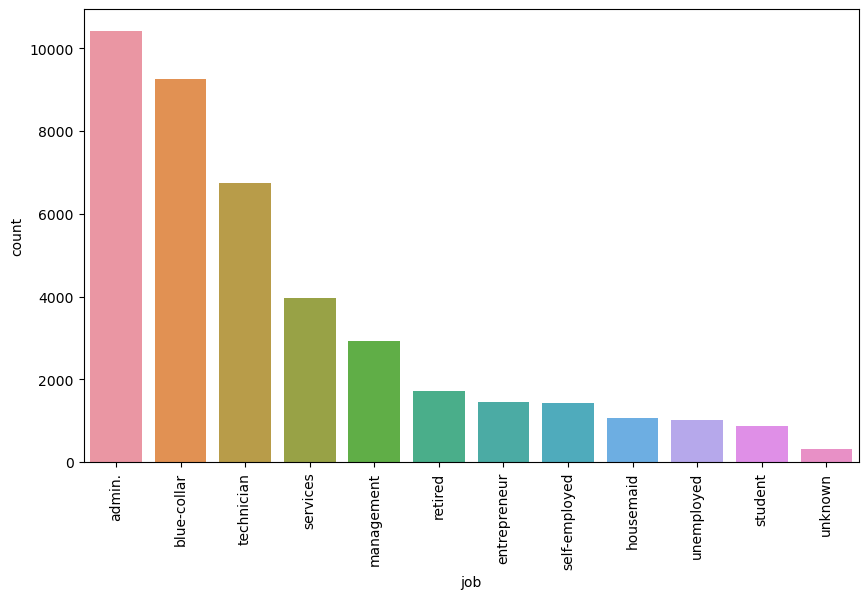

In [25]:
plt.figure(figsize = (10 , 6) , dpi=100)

sns.countplot(data = data , x = "job" , order= data["job"].value_counts().index)

plt.xticks(rotation = 90);   #sorted plot

In [26]:
# encoding the categorical data unsing get_dummies

In [27]:
X = pd.get_dummies(data)

In [29]:
#X.head()

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scalar = StandardScaler()

In [32]:
scaled_X = scalar.fit_transform(X) 
#there is no data leakage hare as there is no test set so we directly do fit_transform

In [33]:
 from sklearn.cluster import KMeans

In [35]:
#help(KMeans)

In [36]:
model = KMeans(n_clusters=2)

In [37]:
cluster_labels = model.fit_predict(scaled_X)

#fitting and predicting in single step

In [38]:
cluster_labels

array([1, 1, 1, ..., 0, 0, 0])

In [39]:
#joining our predicted label to our dataset

In [40]:
X["Cluster_labels"] = cluster_labels

In [42]:
#X.head()

In [43]:
#Lets check the corelation between the cluster and features

<AxesSubplot:>

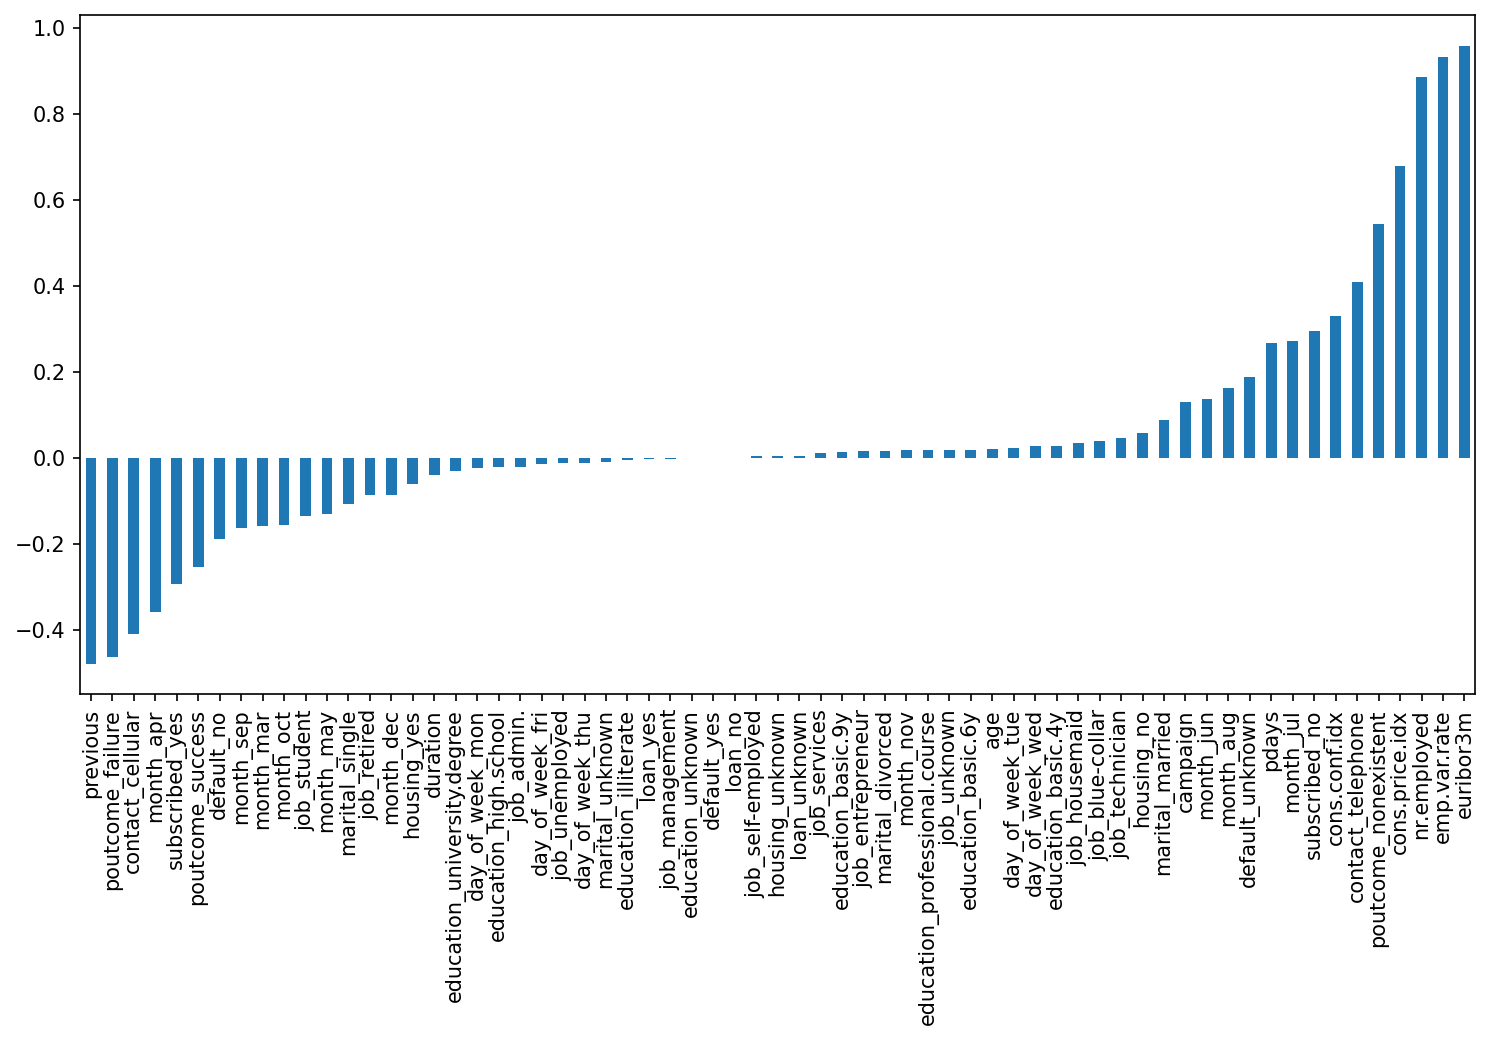

In [49]:
plt.figure(figsize = (12,6) , dpi = 150)

X.corr()["Cluster_labels"].iloc[:-1].sort_values().plot(kind = "bar")

In [51]:
## Checking which value of k is best

In [52]:
ssd = []

for k in range(2,10):
    
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    
    ssd.append(model.inertia_)

In [53]:
ssd

[2469792.361662749,
 2370787.879948266,
 2282647.3109093998,
 2192021.3927325346,
 2149009.8543173433,
 2114496.8195095463,
 2048695.0671347436,
 2007686.0580134308]

<AxesSubplot:>

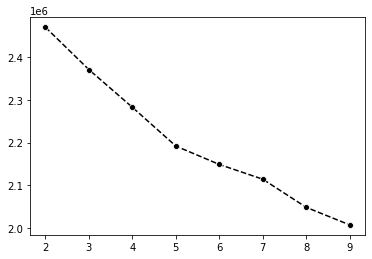

In [61]:
sns.lineplot(x = range(2,10) , y = ssd , marker = "o", linestyle = "--", color = "black")